### I have developed the program to predicted answers for given question from dataset for that i have used the pre-trained TAPAS model and tokenizer with Hugging face transformers in Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams
from sklearn import preprocessing

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

#### Read the Dataset

In [3]:
address = "/Users/chalana/Desktop/Question generator/Question_Generator/worldcities.csv"
cities = pd.read_csv(address)
cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068007388


In [4]:
print(cities.shape)
print(cities.columns)

(44691, 11)
Index(['city', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id'],
      dtype='object')


In [5]:
print(cities.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        44691 non-null  object 
 1   city_ascii  44691 non-null  object 
 2   lat         44691 non-null  float64
 3   lng         44691 non-null  float64
 4   country     44691 non-null  object 
 5   iso2        44658 non-null  object 
 6   iso3        44691 non-null  object 
 7   admin_name  44375 non-null  object 
 8   capital     11138 non-null  object 
 9   population  44384 non-null  float64
 10  id          44691 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.8+ MB
None


#### Checking For missing values

In [6]:
cities.isnull().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             33
iso3              0
admin_name      316
capital       33553
population      307
id                0
dtype: int64

#### Remove unnecessary Features

In [7]:
column_to_drop = 'capital'
cities = cities.drop(column_to_drop, axis=1)

print("\nDataFrame after dropping column '{}':".format(column_to_drop))
cities


DataFrame after dropping column 'capital':


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,1068007388


#### Replace the missing values

In [8]:
mean_value = cities['population'].mean().round(0)
mean_value

114374.0

In [9]:
cities['population'].fillna(mean_value, inplace=True)

In [10]:
cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,114374.0,1068007388


In [11]:
cities.isnull().sum()

city            0
city_ascii      0
lat             0
lng             0
country         0
iso2           33
iso3            0
admin_name    316
population      0
id              0
dtype: int64

#### Drop other null values

In [12]:
cities = cities.dropna()
cities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...
44685,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,10.0,1643472801
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,10.0,1643985006
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,114374.0,1068007388


In [13]:
cities.isnull().sum()

city          0
city_ascii    0
lat           0
lng           0
country       0
iso2          0
iso3          0
admin_name    0
population    0
id            0
dtype: int64

In [14]:
print(cities.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44342 entries, 0 to 44690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        44342 non-null  object 
 1   city_ascii  44342 non-null  object 
 2   lat         44342 non-null  float64
 3   lng         44342 non-null  float64
 4   country     44342 non-null  object 
 5   iso2        44342 non-null  object 
 6   iso3        44342 non-null  object 
 7   admin_name  44342 non-null  object 
 8   population  44342 non-null  float64
 9   id          44342 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 3.7+ MB
None


In [15]:
cities.describe()

,lat,lng,population,id
count,44342.000000,44342.000000,4.434200e+04,4.434200e+04
mean,25.907303,14.249687,1.143548e+05,1.453900e+09
std,23.216164,71.211865,7.135793e+05,2.630844e+08
min,-54.933300,-179.600000,0.000000e+00,1.004003e+09
25%,12.853875,-48.478150,1.222300e+04,1.250573e+09
50%,32.341150,13.116700,2.117700e+04,1.380708e+09
75%,43.297000,77.305725,4.919075e+04,1.706172e+09
max,77.466700,179.370300,3.773200e+07,1.901975e+09


#### Generating a scatter plot matrix

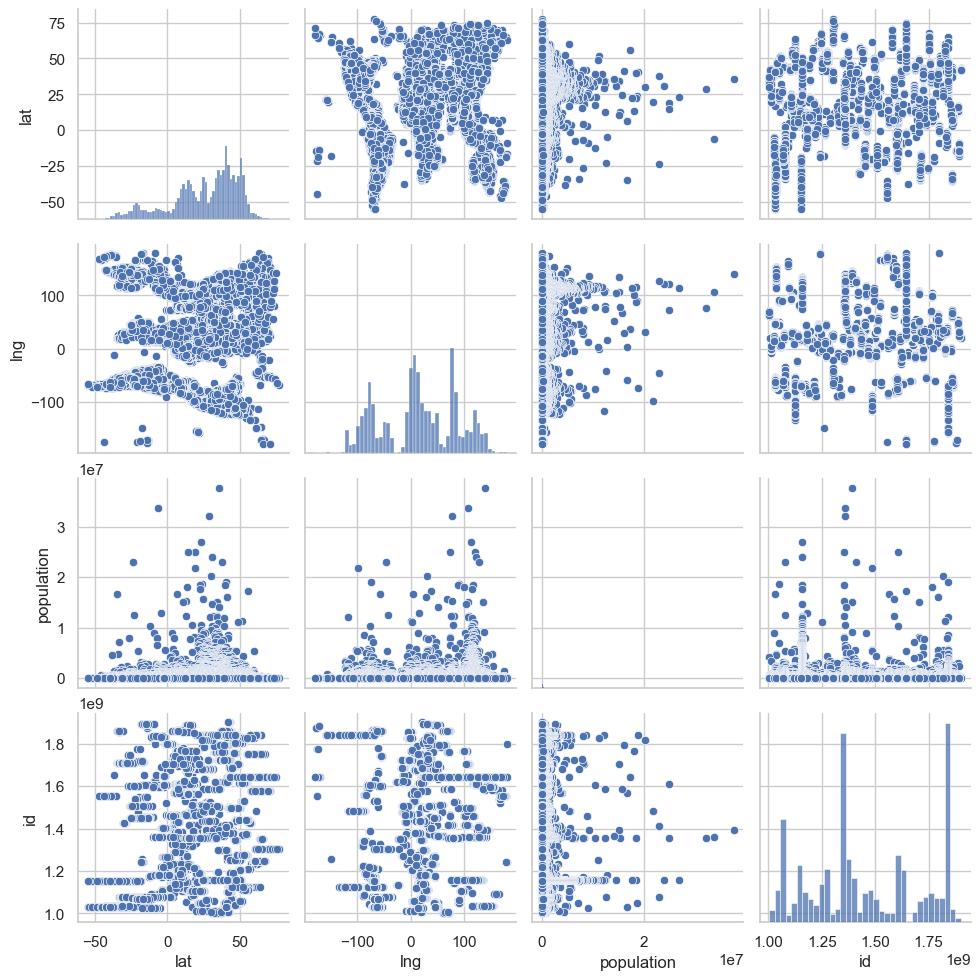

In [16]:
sb.pairplot(cities)

In [17]:
# Treat all values as string
data = cities.astype(str)
# Define the questions
queries = ["Which city has most lng?",
           "What is the average number of population?",
           "Which city has most population?"]

print("Suggested Question :\n")

for i in queries:
    print(i)

Suggested Question :

Which city has most lng?
What is the average number of population?
Which city has most population?


#### loads the pre-trained TAPAS model and tokenizer

In [18]:
from transformers import TapasTokenizer, TapasForQuestionAnswering
import pandas as pd

def load_model_and_tokenizer():
    # Load pretrained tokenizer: TAPAS finetuned on WikiTable Questions
    tokenizer = TapasTokenizer.from_pretrained("google/tapas-base-finetuned-wtq")

    # Load pretrained model: TAPAS finetuned on WikiTable Questions
    model = TapasForQuestionAnswering.from_pretrained("google/tapas-base-finetuned-wtq")

    return tokenizer, model

#### Generating Prediction

In [19]:
def generate_predictions(inputs, model, tokenizer):
    """
      Generate predictions for some tokenized input.
    """
    # Generate model results
    outputs = model(**inputs)

    # Convert logit outputs into predictions for table cells and aggregation operators
    predicted_table_cell_coords, predicted_aggregation_operators = tokenizer.convert_logits_to_predictions(
        inputs,
        outputs.logits.detach(),
        outputs.logits_aggregation.detach()
    )

    # Return values
    return predicted_table_cell_coords, predicted_aggregation_operators

#### Postprocessing Predictions

In [20]:
def postprocess_predictions(predicted_aggregation_operators, predicted_table_cell_coords, table):
    """
      Compute the predicted operation and nicely structure the answers.
    """
    # Process predicted aggregation operators
    aggregation_operators = {0: "NONE", 1: "SUM", 2: "AVERAGE", 3:"COUNT"}
    aggregation_predictions_string = [aggregation_operators[x] for x in predicted_aggregation_operators]

    # Process predicted table cell coordinates
    answers = []
    for coordinates in predicted_table_cell_coords:
        if len(coordinates) == 1:
            # 1 cell
            answers.append(table.iat[coordinates[0]])
        else:
            # > 1 cell
            cell_values = []
            for coordinate in coordinates:
                cell_values.append(table.iat[coordinate])
            answers.append(", ".join(cell_values))

    # Return values
    return aggregation_predictions_string, answers

#### Displaying Answers

In [21]:
def show_answers(queries, answers, aggregation_predictions_string):
    """
      Visualize the postprocessed answers.
    """
    for query, answer, predicted_agg in zip(queries, answers, aggregation_predictions_string):
        print("\n" + query)
        if predicted_agg == "NONE":
            print("Predicted answer: " + answer)
        else:
            print("Predicted answer: " + predicted_agg + " > " + answer)

#### Processing in Batches

In [22]:
def process_batch(table, queries, batch_size, model, tokenizer):
    num_samples = len(table)
    #for i in range(0, num_samples, batch_size):
    for i in range(0, num_samples, batch_size):
        batch_table = table.iloc[i:i+batch_size]
        inputs = tokenizer(table=batch_table, queries=queries, padding='max_length', return_tensors="pt")
        predicted_table_cell_coords, predicted_aggregation_operators = generate_predictions(inputs, model, tokenizer)
        aggregation_predictions_string, answers = postprocess_predictions(predicted_aggregation_operators, predicted_table_cell_coords, batch_table)
        show_answers(queries, answers, aggregation_predictions_string)

#### Running TAPAS

In [23]:
def run_tapas():
    tokenizer, model = load_model_and_tokenizer()

    # Define the table
    table = data

    batch_size = 2  # Set the batch size

    process_batch(table, queries, batch_size, model, tokenizer)

In [24]:
if __name__ == '__main__':
    run_tapas()


Which city has most lng?
Predicted answer: Tokyo

What is the average number of population?
Predicted answer: AVERAGE > 37732000.0, 33756000.0

Which city has most population?
Predicted answer: Tokyo


IndexError: iloc cannot enlarge its target object